## Capstone Project - Default of Credit Card Clients

Prepared by Debora Callegari

### Imports

In [1]:
#Importing the necessary packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

### Step 5: Splitting the data

In [51]:
df_dummy_2.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,pay_5_7,pay_5_8,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,0,0,1,0,0,0,0,0,0,0
2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,0,0,0,1,0,0,0,0,0,0
3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,0,0,1,0,0,0,0,0,0,0
5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
# Splitting into features and target
X = df_dummy_2.drop('default', axis=1)
y = df_dummy_2['default']

In [53]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (29623, 74)
y shape: (29623,)


In [54]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [55]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23698, 74)
y_train shape: (23698,)
X_test shape: (5925, 74)
y_test shape: (5925,)


To keep the balance of classes in each set, I am setting stratify equal to the target label variable.

In [56]:
#Transforming data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Step 6: Fitting models

For this case, I chose 4 models, such as Logistic Regression, Decision Tree, Support Vector Machines and Random Forest (one bagging algorithm). For step 9 I tried Gradient Boosting (on boosting algorithm). It is a good start to try different models and compare the final results.

There are many options to handle with imbalanced data. For this case, I chose to use class_weight, one of the simplest ways to deal with imbalance classes. It is a good approach to try it first because I will expect that the final result would be able to learn equally from both classes.

The description of the parameter class_weight is showed bellow:

    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data: n_samples / (n_classes * np.bincount(y)).

#### 6.1. Logistic regression

In [53]:
# Fitting logistic regression model the training data
LR_model = LogisticRegression(class_weight='balanced', random_state=42)
LR_model.fit(X_train, y_train)

# Evaluating the model
y_pred_train_LR = LR_model.predict(X_train)
y_pred_test_LR = LR_model.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_LR):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_LR):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_LR):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_LR):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_LR):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_LR):3.3f}")

Train Precision: 50.979
Train Recall: 56.186
Train F1: 53.456


Test Precision: 50.441
Test Recall: 56.837
Test F1: 53.448


In [54]:
# Checking how many classes the model is predicting
print(np.unique(y_pred_test_LR))

[0 1]


In [55]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4616
           1       0.50      0.57      0.53      1309

   micro avg       0.78      0.78      0.78      5925
   macro avg       0.69      0.71      0.70      5925
weighted avg       0.79      0.78      0.79      5925



The accuracy score for this case is not a good measure because the dataset has imbalanced classes. The accuracy can predict only class 0 (non-default) and it will be a big mistake because the accuracy for 0 is very high. So, it is important to look at other parameters, such as precision, recall and F1 score, to evaluate the model and see how well the model is performing.

Considering the results above, it is tricky to compare the models because they present lower precision and higher recall. So, because of that, I will use the F1 score to compare the results. It is possible to see that the results are very close on the train and on the test set, which is good because we are avoiding over-fit the model.

[[3885  731]
 [ 565  744]]


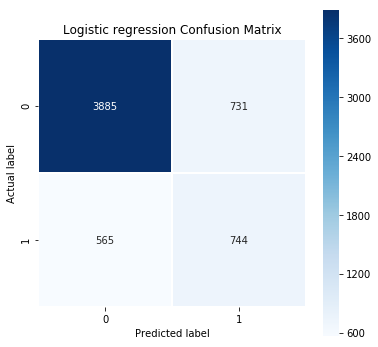

In [56]:
# Getting the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_test_LR)
print(cm_LR)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_LR, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Logistic regression Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

As I mentioned before, I am considering that `default` as positive class and `non-default` as negative class. So, for this binary classification problem, we can see that there are two types of errors that the model can do:

    - Predict that the client will pay when in fact he will default (False Negative)
    - Predict that the client will default when in fact he will pay (False Positive)

The confusion matrix above showed that the sum of the correct predictions that the model made is equal to 4629 (TN + TP = 3885 + 744). Also, it is possible to see that the model predicted 1296 labels incorrectly. Which means that the model predicted that 565 clients will pay the credit card amount when actually they will default. And the model predicted that 731 clients will default the credit card payment when actually they will pay.

#### 6.2. Decision Tree

In [57]:
# Fitting Decision Tree model to the training data
DT_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
DT_model.fit(X_train, y_train)

# Evaluating the model
y_pred_train_DT = DT_model.predict(X_train)
y_pred_test_DT = DT_model.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_DT):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_DT):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_DT):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_DT):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_DT):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_DT):3.3f}")

Train Precision: 99.658
Train Recall: 100.000
Train F1: 99.828


Test Precision: 38.692
Test Recall: 38.426
Test F1: 38.559


In [58]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_DT))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4616
           1       0.39      0.38      0.39      1309

   micro avg       0.73      0.73      0.73      5925
   macro avg       0.61      0.61      0.61      5925
weighted avg       0.73      0.73      0.73      5925



For the Decision Tree, the previous results show that the training F1 score is much higher than the test F1 score, so here we are not avoiding over-fit the model.

[[3819  797]
 [ 806  503]]


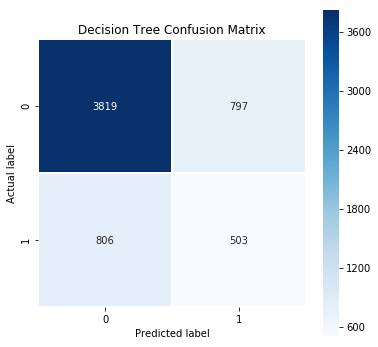

In [59]:
# Getting the confusion matrix
cm_DT = confusion_matrix(y_test, y_pred_test_DT)
print(cm_DT)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_DT, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Decision Tree Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

The confusion matrix above showed that the sum of the correct predictions that the model made is equal to 4322 (TN + TP = 3819 + 503). Also, it is possible to see that the model predicted 1603 labels incorrectly. Which means that the model predicted that 806 clients will pay the credit card amount when actually they will default. And the model predicted that 797 clients will default the credit card payment when actually they will pay.

#### 6.3.  Support Vector Machines

In [60]:
from sklearn.svm import SVC

SVC_model = SVC(kernel='rbf', class_weight='balanced', probability=True)
SVC_model.fit(X_train, y_train)

# Evaluating the model
y_pred_train_SVC = SVC_model.predict(X_train)
y_pred_test_SVC = SVC_model.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_SVC):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_SVC):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_SVC):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_SVC):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_SVC):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_SVC):3.3f}")

Train Precision: 47.879
Train Recall: 61.397
Train F1: 53.802


Test Precision: 46.774
Test Recall: 62.032
Test F1: 53.333


In [61]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_SVC))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4616
           1       0.47      0.62      0.53      1309

   micro avg       0.76      0.76      0.76      5925
   macro avg       0.67      0.71      0.69      5925
weighted avg       0.79      0.76      0.77      5925



Considering the results above, it is tricky to compare the models because they present low precision and high recall. So, because of that, I will use the F1 score to compare the results. For the SVC, it is possible to see that the results are very close on the train and on the test set, which is good because we are avoiding over-fit the model.

[[3692  924]
 [ 497  812]]


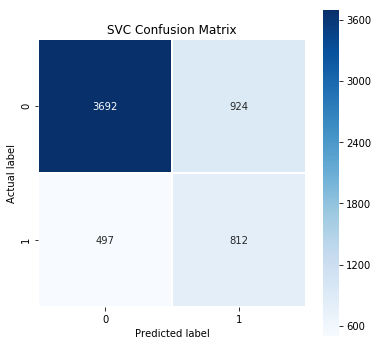

In [62]:
# Getting the confusion matrix
cm_SVC = confusion_matrix(y_test, y_pred_test_SVC)
print(cm_SVC)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_SVC, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('SVC Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

The confusion matrix above showed that the sum of the correct predictions that the model made is equal to 4504 (TN + TP = 3692 + 812). Also, it is possible to see that the model predicted 1421 labels incorrectly. Which means that the model predicted that 497 clients will pay the credit card amount when actually they will default. And the model predicted that 924 clients will default the credit card payment when actually they will pay.

#### 6.4.  Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(class_weight='balanced', random_state = 42)
RF_model.fit(X_train,y_train)


y_pred_train_RF = RF_model.predict(X_train)
y_pred_test_RF = RF_model.predict(X_test)

print(f"Train Precision: {100*precision_score(y_train, y_pred_train_RF):3.3f}")
print(f"Train Recall: {100*recall_score(y_train, y_pred_train_RF):3.3f}")
print(f"Train F1: {100*f1_score(y_train, y_pred_train_RF):3.3f}")

print('\n')

print(f"Test Precision: {100*precision_score(y_test, y_pred_test_RF):3.3f}")
print(f"Test Recall: {100*recall_score(y_test, y_pred_test_RF):3.3f}")
print(f"Test F1: {100*f1_score(y_test, y_pred_test_RF):3.3f}")

Train Precision: 99.286
Train Recall: 90.206
Train F1: 94.528


Test Precision: 63.636
Test Recall: 30.481
Test F1: 41.219


In [56]:
# Getting the classification report
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4616
           1       0.64      0.30      0.41      1309

   micro avg       0.81      0.81      0.81      5925
   macro avg       0.73      0.63      0.65      5925
weighted avg       0.79      0.81      0.78      5925



Considering the results above, it is tricky to compare the models because they present high precision and low recall. So, because of that, I will use the F1 score to compare the results. For the Random Forest, the previous results showed that the training F1 score is much higher than the test F1 score, so here we are not avoiding over-fit the model.

[[4388  228]
 [ 910  399]]


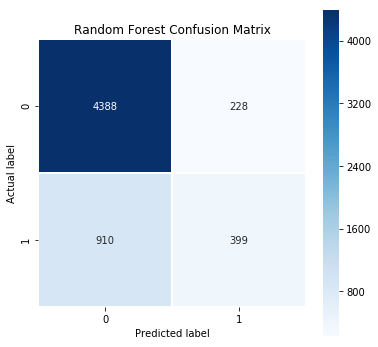

In [57]:
# Getting the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_test_RF)
print(cm_RF)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_RF, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('Random Forest Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

The confusion matrix above showed that the sum of the correct predictions that the model made is equal to 4787 (TN + TP = 4388 + 399). Also, it is possible to see that the model predicted 1138 labels incorrectly. Which means that the model predicted that 910 clients will pay the credit card amount when actually they will default. And the model predicted that 228 clients will default the credit card payment when actually they will pay.